# Logistic Regression - Code

In diesem Notebook schauen wir uns die `Logistic Regression` am Iris Datensatzes an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import ListedColormap

def plot_decision_regions(X_train, X_test, y_train, y_test, classifier, resolution=0.02, same_aspect=False):

    assert(X_train.shape[1] == 2)
    assert(X_test.shape[1] == 2)

    x_label = X_train.columns[0]
    y_label = X_train.columns[1]

    X_train = X_train.values
    X_test = X_test.values

    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])

    palette = dict(zip(
        ['Setosa', 'Versicolor', 'Virginica'],
        sns.color_palette()
    ))

    oe = OrdinalEncoder(categories=[['Setosa', 'Versicolor', 'Virginica']]).fit(y.reshape(-1, 1))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = oe.transform(Z.reshape(-1, 1))
    Z = Z.reshape(xx1.shape)

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette, zorder=3)
    ax = sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], facecolor="none", linewidth=1.5, s=150, fc="none", label='Validation-Set', ax=ax, edgecolor='red', zorder=2)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()), zorder=1)

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel(x_label)
    _ = ax.set_ylabel(y_label)

    return ax

In [7]:
# Load data and rename to be more precise
df = pd.read_csv('data/iris.csv')[['petal length', 'petal width', 'name']].rename(columns={
    'petal length': 'petal length (cm)',  # petal = Blütenblatt
    'petal width': 'petal width (cm)',
})

print(df['name'].value_counts())

Setosa        50
Versicolor    50
Virginica     50
Name: name, dtype: int64


## Logistic Regression (mit 3 Klassen)

Zuerst teilen wir unsere Daten in `Train-Set` und `Validation-Set`:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['name'], test_size=0.25, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 2) (38, 2) (112,) (38,)


Anschliessend trainieren wir ein `Logistic Regression` Modell auf dem `Train-Set`.

In [9]:
model = Pipeline([
    # Ich empfehle bei Logistic Regression den StandardScaler vorher anzuwenden, da die Logistic Regression standardmässig regularisiert
    ('std', StandardScaler()),
    ('clf', LogisticRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', LogisticRegression())])

`model` ist unser Modell, trainiert auf dem `Train-Set`. Intern hat es die lernbaren Paramter (betas) bereits gesetzt.

### Evaluieren

Wir können das gelernte Modell auf Train-Set und Test-Set evaluieren.

In [10]:
from sklearn.metrics import accuracy_score

y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_test_hat = model.predict(X_test)
accuracy_score_test = accuracy_score(y_test, y_test_hat)
print("Test Set:", f"{accuracy_score_test*100}%")

Train Set: 95.53571428571429%
Test Set: 94.73684210526315%


### Modell visualisieren

Da wir nur 2 Features haben, können wir das Modell auch visualisieren.

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


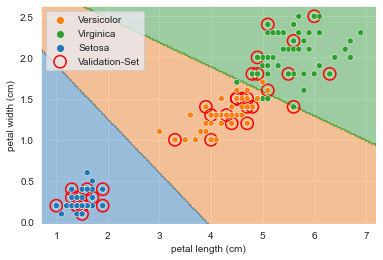

In [11]:
plot_decision_regions(
    X_train,
    X_test,
    y_train.values,
    y_test.values,
    model
)
plt.show()

### Gelernte Parameter (Extra)

Und wir können die gelernten $\vec{\beta}$ ausgeben:

In [12]:
print("beta_1, beta_2:")
print(model['clf'].coef_)
print("beta_0:")
print(model['clf'].intercept_)

beta_1, beta_2:
[[-2.3670054  -2.10563095]
 [ 0.18460345 -0.40972704]
 [ 2.18240195  2.51535799]]
beta_0:
[-0.75576977  1.73717144 -0.98140167]


Wir haben 3 Klassen, also lernen wir 3 Lineare Modelle.
Darum haben wir:
* in `coef_` 3 Mal ein `beta_1` und ein `beta_2`
* in `intercept_` 3 Mal ein `beta_0`

Hätten wir ein Binäres Problem ("nur" zwei Klassen), dann hätten wir 1 Mal ein `beta_0` und ein `beta_1` und ein `beta_2`